# E-commerce market analytics 
Eniac Tech company is an e-commerce tech company which hired you as a data analyst to handle their internal data. Due to the complexity of their dataset, they understand that the data can be a bit more chaotic! The complexity of these tasks will require you to use Python.

The company is hopeful that your work can settle an ongoing debate: whether or not it’s beneficial to discount products.
For detailed description, use link: https://drive.google.com/file/d/1XYzuuuuS_Cyxhy0hDFj38oMLVIYkYp_m/view?usp=sharing

Your analytical and business skills are needed to provide clarity in the following
aspects:
- How should products be classified into different categories to simplify reports
and analysis?
- What is the distribution of product prices across different categories?
- How many products are being discounted?
- How big are the offered discounts as a percentage of the product prices?
- How do seasonality and special dates (Christmas, Black Friday) affect sales?
- How could data collection be improved?

At the end of the project, you are expected to give a presentation to the company
board and present the results of your analysis. The presentation needs to be
concise, but also engaging and convincing.

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
orderlines = pd.read_csv('orderlines.csv')
brands = pd.read_csv('brands.csv')

In [3]:
#make copies of data
product = products.copy()
order = orders.copy()
orderline = orderlines.copy()
brand = brands.copy()

### Exploratory Data Analysis

In [4]:
# starting with the products data
#check first few lines
order.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [5]:
#checking total number of entries
order.shape

(226909, 4)

In [6]:
#checking additional info
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [7]:
#checking nulls in total paid column
order[order['total_paid'].isnull()]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


In [8]:
#drop nulls in total paid column
order = order.dropna(subset='total_paid')

In [9]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.7+ MB


In [10]:
#changing dtypes
order['created_date'] = pd.to_datetime(order['created_date'])
order['state'] = order['state'].astype('category')

In [11]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 7.1 MB


In [12]:
#summary statistics
order.describe()

,order_id,total_paid
count,226904.000000,226904.000000
mean,413295.872268,569.225818
std,65919.833301,1761.778002
min,241319.000000,0.000000
25%,356261.750000,34.190000
50%,413037.500000,112.990000
75%,470554.250000,525.980000
max,527401.000000,214747.530000


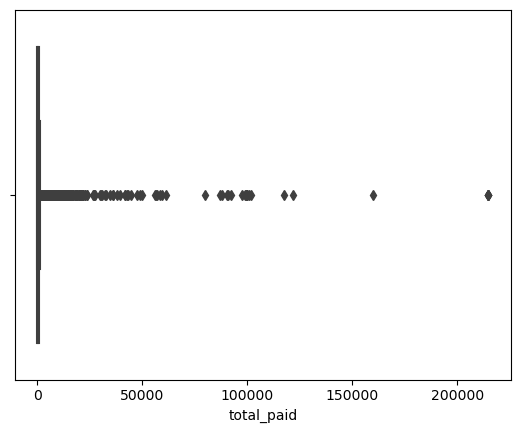

In [13]:
sns.boxplot(data=order, x='total_paid')
plt.show()

In [14]:
#handling outliers
Q1 = order.total_paid.quantile(0.25)
Q3 = order.total_paid.quantile(0.75)
Q3

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [15]:
#filter dataset order
order_data = order[(order.total_paid > lower_limit)&(order.total_paid < upper_limit)]
order_data

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [16]:
order_data.describe()

,order_id,total_paid
count,196375.00000,196375.000000
mean,409902.13187,214.499005
std,65846.18633,290.381032
min,241319.00000,0.000000
25%,352950.50000,28.990000
50%,407648.00000,81.980000
75%,467565.50000,285.975000
max,527401.00000,1263.000000


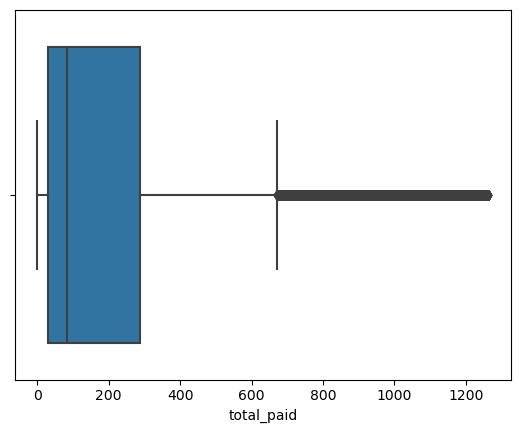

In [17]:
#checking for outliers in new order data
sns.boxplot(data=order_data, x= 'total_paid')
plt.show()

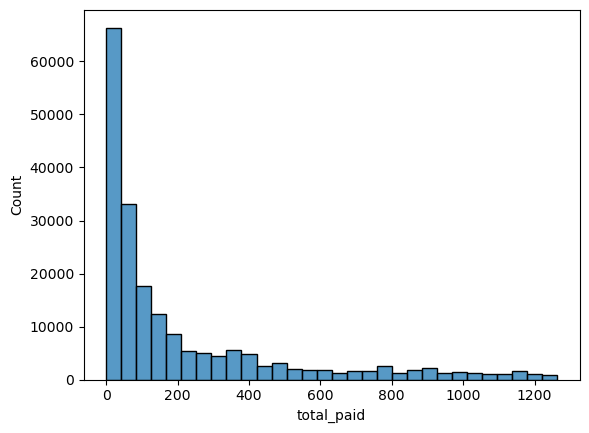

In [18]:
#checking distribution of total paid amounts in new order data
sns.histplot(data=order_data, x='total_paid', bins=30)
plt.show()

In [19]:
#sorting total paid values in descending order
count_total_paid_units = order_data[order_data['total_paid'] > 600]
count_total_paid_units.sort_values(by='total_paid', ascending=False)

,order_id,created_date,total_paid,state
113263,412849,2017-10-15 23:35:29,1263.00,Place Order
213292,513783,2018-02-18 16:13:29,1263.00,Shopping Basket
213398,513889,2018-02-18 19:45:29,1263.00,Shopping Basket
179194,479587,2018-01-02 14:15:05,1263.00,Completed
196495,496979,2018-01-23 15:43:48,1263.00,Shopping Basket
...,...,...,...,...
95742,395325,2017-09-01 09:29:58,600.33,Shopping Basket
102224,401809,2017-09-19 13:20:37,600.33,Shopping Basket
223276,523768,2018-03-09 12:40:25,600.31,Shopping Basket
88054,387633,2017-08-08 19:35:45,600.17,Shopping Basket


Working on orderlines table

In [20]:
#preview first 5 rows
orderline.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [21]:
#check shape
orderline.shape

(293983, 7)

In [22]:
#check additional info
orderline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [23]:
#preview columns
orderline['unit_price'].head()

0     18.99
1    399.00
2    474.05
3     68.39
4     23.74
Name: unit_price, dtype: object

In [24]:
#change dtypes
orderline['date'] = pd.to_datetime(orderline['date'])

In [25]:
#sort unit prices in descending order
orderline.sort_values(by='unit_price', ascending=False)

,id,id_order,product_id,product_quantity,sku,unit_price,date
47639,1217231,340894,0,1,DLL0044,999.99,2017-03-30 17:21:19
59635,1238120,350975,0,1,DLL0044,999.99,2017-04-29 01:15:24
57649,1234665,349364,0,1,DLL0044,999.99,2017-04-24 20:48:59
47005,1216078,340352,0,1,DLL0044,999.99,2017-03-29 10:13:17
98612,1307530,384443,0,1,GTE0105,999.99,2017-07-31 12:15:36
...,...,...,...,...,...,...,...
265154,1604206,507539,0,1,OWC0188,0.00,2018-02-07 16:31:05
67746,1252262,351016,0,1,LIBRO,0.00,2017-05-22 11:34:20
265156,1604208,507539,0,1,IFX0181,0.00,2018-02-07 16:31:05
261851,1598968,505423,0,1,APP1020,0.00,2018-02-04 12:07:53


In [26]:
#remove decimal points and change datatype
orderline['unit_price'] = orderline['unit_price'].str.replace('.','', regex=False)


#change dtype
orderline['unit_price'] = orderline['unit_price'].astype('float')

In [27]:
#convert dataset info
orderline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 15.7+ MB


In [28]:
orderline.describe()

,id,id_order,product_id,product_quantity,unit_price
count,2.939830e+05,293983.000000,293983.0,293983.000000,2.939830e+05
mean,1.397918e+06,419999.116544,0.0,1.121126,4.098552e+04
std,1.530096e+05,66344.486479,0.0,3.396569,8.370655e+04
min,1.119109e+06,241319.000000,0.0,1.000000,-1.190000e+04
25%,1.262542e+06,362258.500000,0.0,1.000000,3.599000e+03
50%,1.406940e+06,425956.000000,0.0,1.000000,9.299000e+03
75%,1.531322e+06,478657.000000,0.0,1.000000,3.395800e+04
max,1.650203e+06,527401.000000,0.0,999.000000,1.599898e+07


In [29]:
#filter all unit prices greater than zero to use
orderline_clean = orderline[orderline['unit_price'] > 0]

orderline_clean

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,1899.0,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,39900.0,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,47405.0,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,6839.0,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,2374.0,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,4299.0,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,14158.0,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,999.0,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,1999.0,2018-03-14 13:58:01


In [30]:
orderline_clean.describe()

,id,id_order,product_id,product_quantity,unit_price
count,2.931170e+05,293117.000000,293117.0,293117.000000,2.931170e+05
mean,1.397819e+06,419955.669893,0.0,1.121208,4.110665e+04
std,1.530125e+05,66346.550105,0.0,3.401222,8.380039e+04
min,1.119109e+06,241319.000000,0.0,1.000000,1.000000e+00
25%,1.262676e+06,362334.000000,0.0,1.000000,3.599000e+03
50%,1.406717e+06,425843.000000,0.0,1.000000,9.325000e+03
75%,1.531182e+06,478591.000000,0.0,1.000000,3.409900e+04
max,1.650203e+06,527401.000000,0.0,999.000000,1.599898e+07


In [31]:
#handling outliers
Q1 = orderline_clean.unit_price.quantile(0.25)
Q3 = orderline_clean.unit_price.quantile(0.75)
Q3

IQR = Q3 - Q1

lower = np.abs(Q1 - 1.5*IQR)
upper = np.abs(Q3 + 1.5*IQR)

print(lower, upper)

42151.0 79849.0


In [32]:
#filter out the outliers
clean_orderline = orderline_clean[(orderline_clean.unit_price>lower)&(orderline_clean.unit_price<upper)]

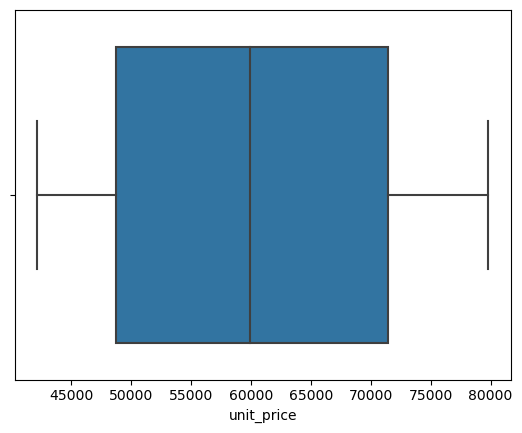

In [33]:
#checking for outliers
sns.boxplot(data=clean_orderline, x='unit_price')
plt.show()

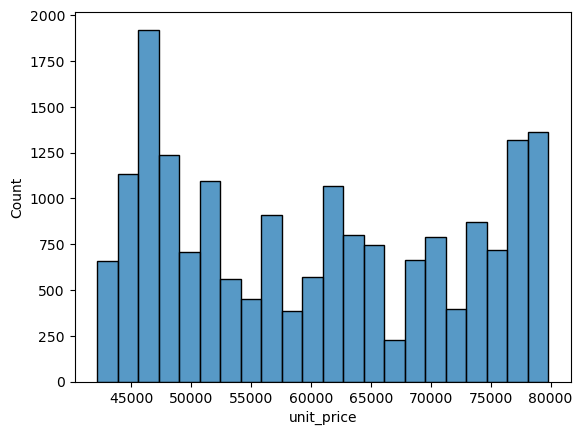

In [34]:
sns.histplot(data=clean_orderline, x='unit_price')
plt.show()

Working on Products Table

In [35]:
#preview top 5
product.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [36]:
#check shape
product.shape

(19326, 7)

In [37]:
#check additional info
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [38]:
#check for nulls in product description
product['desc'].isna().sum()

#remove null
product = product.dropna(subset='desc')

In [39]:
#check for nulls in price
product['price'].isna().sum()

#remove nulls
product = product.dropna(subset='price')

In [40]:
#check for nulls in type
product['type'].isna().sum()

#remove nulls
product = product.dropna(subset='type')

In [41]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19223 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19223 non-null  object
 1   name         19223 non-null  object
 2   desc         19223 non-null  object
 3   price        19223 non-null  object
 4   promo_price  19223 non-null  object
 5   in_stock     19223 non-null  int64 
 6   type         19223 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [42]:
#previewing price column
product.sort_values(by=['price'], ascending=False)

,sku,name,desc,price,promo_price,in_stock,type
14964,PAC1923,"Second hand - Apple iMac 215 ""Core i5 Quad-Cor...",IMac used i5 215 inch quad-core 27GHz | 8GB RA...,999.99,9.195.843,0,1282
19050,FIB0007,Fibaro Monoxide Detector Sensor HomeKit,Fibaro Monoxide Detector Sensor HomeKit for iP...,999.944,999.944,1,11905404
2670,SNN0041,Sonnet Tango USB 3.0 / FW800 PCIe Card,PCIe adapter card 3 FireWire 800 ports and 2 U...,999.944,999.944,0,1276
10745,BEL0145-A,Open - Belkin Switch + Motion WeMO Wi-Fi contr...,Kit + motion switch for sensor devices via App.,999.944,254.736,0,1298
10876,ELG0033-2,Elgato Eve and Energy Plug Power Wireless Sens...,Control on / off and power / consumer remote s...,999.896,999.896,1,11905404
...,...,...,...,...,...,...,...
17392,OWC0190-A,Open - Mac OWC Memory 16GB 1333MHZ DDR3 DIMM,16GB RAM for Mac Pro 2010/2012 Reconditioned,1.199.897,967.572,0,1364
11102,KAN0022-A,Open - Kanex adapter Thunderbolt to Ethernet +...,Gigabyte Thunderbolt adapter cable to Ethernet...,1.199.897,903.296,0,1298
1459,PAC0562,Kingston V300 SSD expansion kit for Mac mini 1...,SSD upgrade kit for Mac mini 120GB 2011 Late 2...,1.169.795,1.065.841,0,1433
12316,KIN0127,Kingston 32GB Micro SDHC Class 10 45MB / s,32GB micro SDHC card with adapter,1.099.043,109.904,0,57445397


In [43]:
# def clean_number(value):
#     if isinstance(value, str):
#         dot_count = value.count('.')
        
#         if dot_count > 1:
#             return int(value.replace('.',''))
#         elif dot_count==1:
#             return float(value)
#         else:
#             return int(value)
#     else:
#         return value
    
# product['price'] = clean_number(product['price'])

In [50]:
#checking count of decimals in price column greater than one
multiple_decimal_count = product['price'].astype(str).str.count(r'\.').gt(1).sum()

#setting threshold of 5% to drop values if count < threshold
print(f"There are {multiple_decimal_count} prices with more than one decimal point.")
print(f"{(373 / 10477) * 100:.2f}% of entries have two or more dots.")

There are 0 prices with more than one decimal point.
3.56% of entries have two or more dots.


In [51]:
#keep only prices with count of decimals less than 1
product = product[product["price"].astype(str).str.count(r"\.") < 2]
product

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [54]:
#change dtype of price
product['price'] = product['price'].astype('float')

In [56]:
#preview info
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18796 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          18796 non-null  object 
 1   name         18796 non-null  object 
 2   desc         18796 non-null  object 
 3   price        18796 non-null  float64
 4   promo_price  18796 non-null  object 
 5   in_stock     18796 non-null  int64  
 6   type         18796 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [63]:
#repeat process for promo price
#counting the number of decimals in the promo price column
product['promo_price'].str.count(r"\.").gt(1).sum()

#keep only promo prices with one decimals
product =  product[product['promo_price'].str.count(r"\.") < 2]

In [66]:
#change dtype of promo price
product['promo_price'] = product['promo_price'].astype('float')
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6261 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          6261 non-null   object 
 1   name         6261 non-null   object 
 2   desc         6261 non-null   object 
 3   price        6261 non-null   float64
 4   promo_price  6261 non-null   float64
 5   in_stock     6261 non-null   int64  
 6   type         6261 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 391.3+ KB


In [75]:
#checking duplicates in sku
product[product['sku'].duplicated()]

#drop duplicates
clean_product = product.drop_duplicates(subset=['sku'], keep='first')

In [77]:
clean_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          5820 non-null   object 
 1   name         5820 non-null   object 
 2   desc         5820 non-null   object 
 3   price        5820 non-null   float64
 4   promo_price  5820 non-null   float64
 5   in_stock     5820 non-null   int64  
 6   type         5820 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 363.8+ KB


In [92]:
#convert to integer
clean_product['type'] = clean_product['type'].astype(str).str.replace('.', '', regex=False)
clean_product['type'].value_counts()

11865403    1060
1298         592
12635403     356
11905404     332
13835403     269
            ... 
85641716       1
12051714       1
51882158       1
11434          1
12282          1
Name: type, Length: 109, dtype: int64

In [94]:
#change dtype of type to float
clean_product['type'] = clean_product['type'].astype('float')

In [95]:
#brands table
brand

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [97]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


Combining Tables

In [98]:
#clean_product
#clean_orderline
#order_data

In [107]:
#saving order id as id_order to merge later
order_data['id_order'] = order['order_id']

#join orders and orderlines
orders_df = pd.merge(clean_orderline, order_data, on='id_order', how='left')

In [111]:
#combine all tables
df = pd.merge(orders_df, clean_product, on='sku', how='left')
df

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state,name,desc,price,promo_price,in_stock,type
0,1119111,299541,0,1,PAR0071,47405.0,2017-01-01 00:20:57,NaN,2017-01-01 00:20:57,474.05,Shopping Basket,NaN,NaN,NaN,NaN,NaN,NaN
1,1119162,299567,0,1,APP1647,76900.0,2017-01-01 03:16:51,NaN,2017-01-01 03:16:51,769.00,Shopping Basket,NaN,NaN,NaN,NaN,NaN,NaN
2,1119163,299568,0,1,PAR0071,47405.0,2017-01-01 03:29:20,NaN,2017-01-01 03:29:20,474.05,Shopping Basket,NaN,NaN,NaN,NaN,NaN,NaN
3,1119218,296284,0,1,BNQ0042,69900.0,2017-01-01 09:58:35,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1119225,299602,0,1,PAR0071,47405.0,2017-01-01 10:13:44,NaN,2017-01-01 10:13:44,474.05,Place Order,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18581,1649947,527278,0,1,APP1118,46300.0,2018-03-14 12:52:44,NaN,2018-03-14 12:50:01,700.98,Place Order,NaN,NaN,NaN,NaN,NaN,NaN
18582,1650018,527310,0,1,AP20406,45900.0,2018-03-14 13:05:42,NaN,2018-03-14 13:05:42,459.00,Shopping Basket,NaN,NaN,NaN,NaN,NaN,NaN
18583,1650030,527299,0,1,LGE0044,55999.0,2018-03-14 13:07:51,NaN,2018-03-14 12:58:53,607.95,Shopping Basket,NaN,NaN,NaN,NaN,NaN,NaN
18584,1650032,527314,0,1,APP2477,79300.0,2018-03-14 13:07:56,NaN,2018-03-14 13:07:56,799.99,Place Order,NaN,NaN,NaN,NaN,NaN,NaN
